# A metodologia CRISP-DM

A metodologia CRISP-DM é descrita em termos de um modelo de processo hierárquico, consistindo em conjuntos de tarefas descritas em quatro níveis de abstração (de geral a específica): fase, tarefa genérica, tarefa especializada e instância do processo (consulte a figura 1).

No nível superior, o processo de mineração de dados é organizado em várias fases; cada fase consiste em várias tarefas genéricas de segundo nível. Esse segundo nível é chamado de genérico porque se destina a ser geral o suficiente para cobrir todas as situações possíveis de mineração de dados. As tarefas genéricas devem ser o mais completas e estáveis ​​possível. Meios completos que abrangem todo o processo de mineração de dados e todos os aplicativos possíveis de mineração de dados. Estável significa que o modelo deve ser válido para desenvolvimentos ainda imprevistos, como novas técnicas de modelagem.

O terceiro nível, o nível de tarefa especializada, é o local para descrever como as ações nas tarefas genéricas devem ser realizadas em determinadas situações específicas. Por exemplo, no segundo nível, pode haver uma tarefa genérica chamada dados limpos. O terceiro nível descreve como essa tarefa difere em diferentes situações, como a limpeza de valores numéricos versus a limpeza de valores categóricos, ou se o tipo de problema é clustering ou modelagem preditiva.

A descrição de fases e tarefas como etapas discretas executadas em uma ordem específica representa uma sequência idealizada de eventos. Na prática, muitas das tarefas podem ser executadas em uma ordem diferente, e muitas vezes será necessário voltar repetidamente às tarefas anteriores e repetir determinadas ações. Nosso modelo de processo não tenta capturar todas essas rotas possíveis por meio do processo de mineração de dados, porque isso exigiria um modelo de processo excessivamente complexo.

O quarto nível, a instância do processo, é um registro das ações, decisões e resultados de um compromisso real de mineração de dados. Uma instância do processo é organizada de acordo com as tarefas definidas nos níveis mais altos, mas representa o que realmente aconteceu em um compromisso específico, e não o que acontece em geral.

![Figura 1 - Repartição em quatro níveis da metodologia CRISP-DM](/content/Image/Figura_1_-_Repartição_em_quatro_níveis_da_metodologia_CRISP-DM.png)



Download da biblioteca **yfinance** para coletar as informações das ações.

In [3]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 40.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=e5ee348390caa7becd8caeb46c881f58d4f0749dc891439cb034611c8317bb25
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Importação das bibliotecas que serão utilizadas no processo de análise.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

# Coleta das informações da ação

In [8]:
ticket = yf.Ticker('^BVSP')
#df = ticket.history(period='3y', interval='1mo')
df = ticket.history(interval='1d', start='2018-01-01', end='2021-08-31')

Visualização dos primeiros cinco registros.

In [9]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0
2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0
2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0
2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0
2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0


Visualização dos últimos cinco registros.

In [10]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-19,116641.000000,117453.000000,114801.000000,117165.00000,10525900,0,0
2021-08-20,117163.000000,118308.000000,116040.000000,118053.00000,8929300,0,0
2021-08-23,118053.000000,118445.000000,117062.000000,117472.00000,7853000,0,0
2021-08-24,117474.000000,120463.000000,117474.000000,120211.00000,9181000,0,0
2021-08-25,120210.210938,120587.757812,119225.929688,120531.28125,0,0,0


# Decomposição de uma serie temporal

Modelos matemáticos
https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


In [14]:
df[['Close']].head()

,Close
Date,
2018-01-02,77891.0
2018-01-03,77995.0
2018-01-04,78647.0
2018-01-05,79071.0
2018-01-08,79379.0


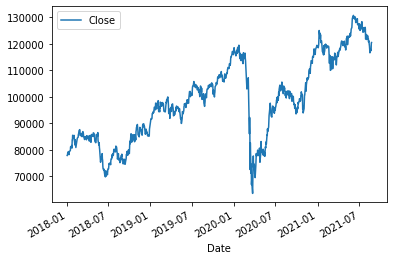

In [19]:
df[['Close']].plot()

In [18]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', freq=30, extrapolate_trend=30)

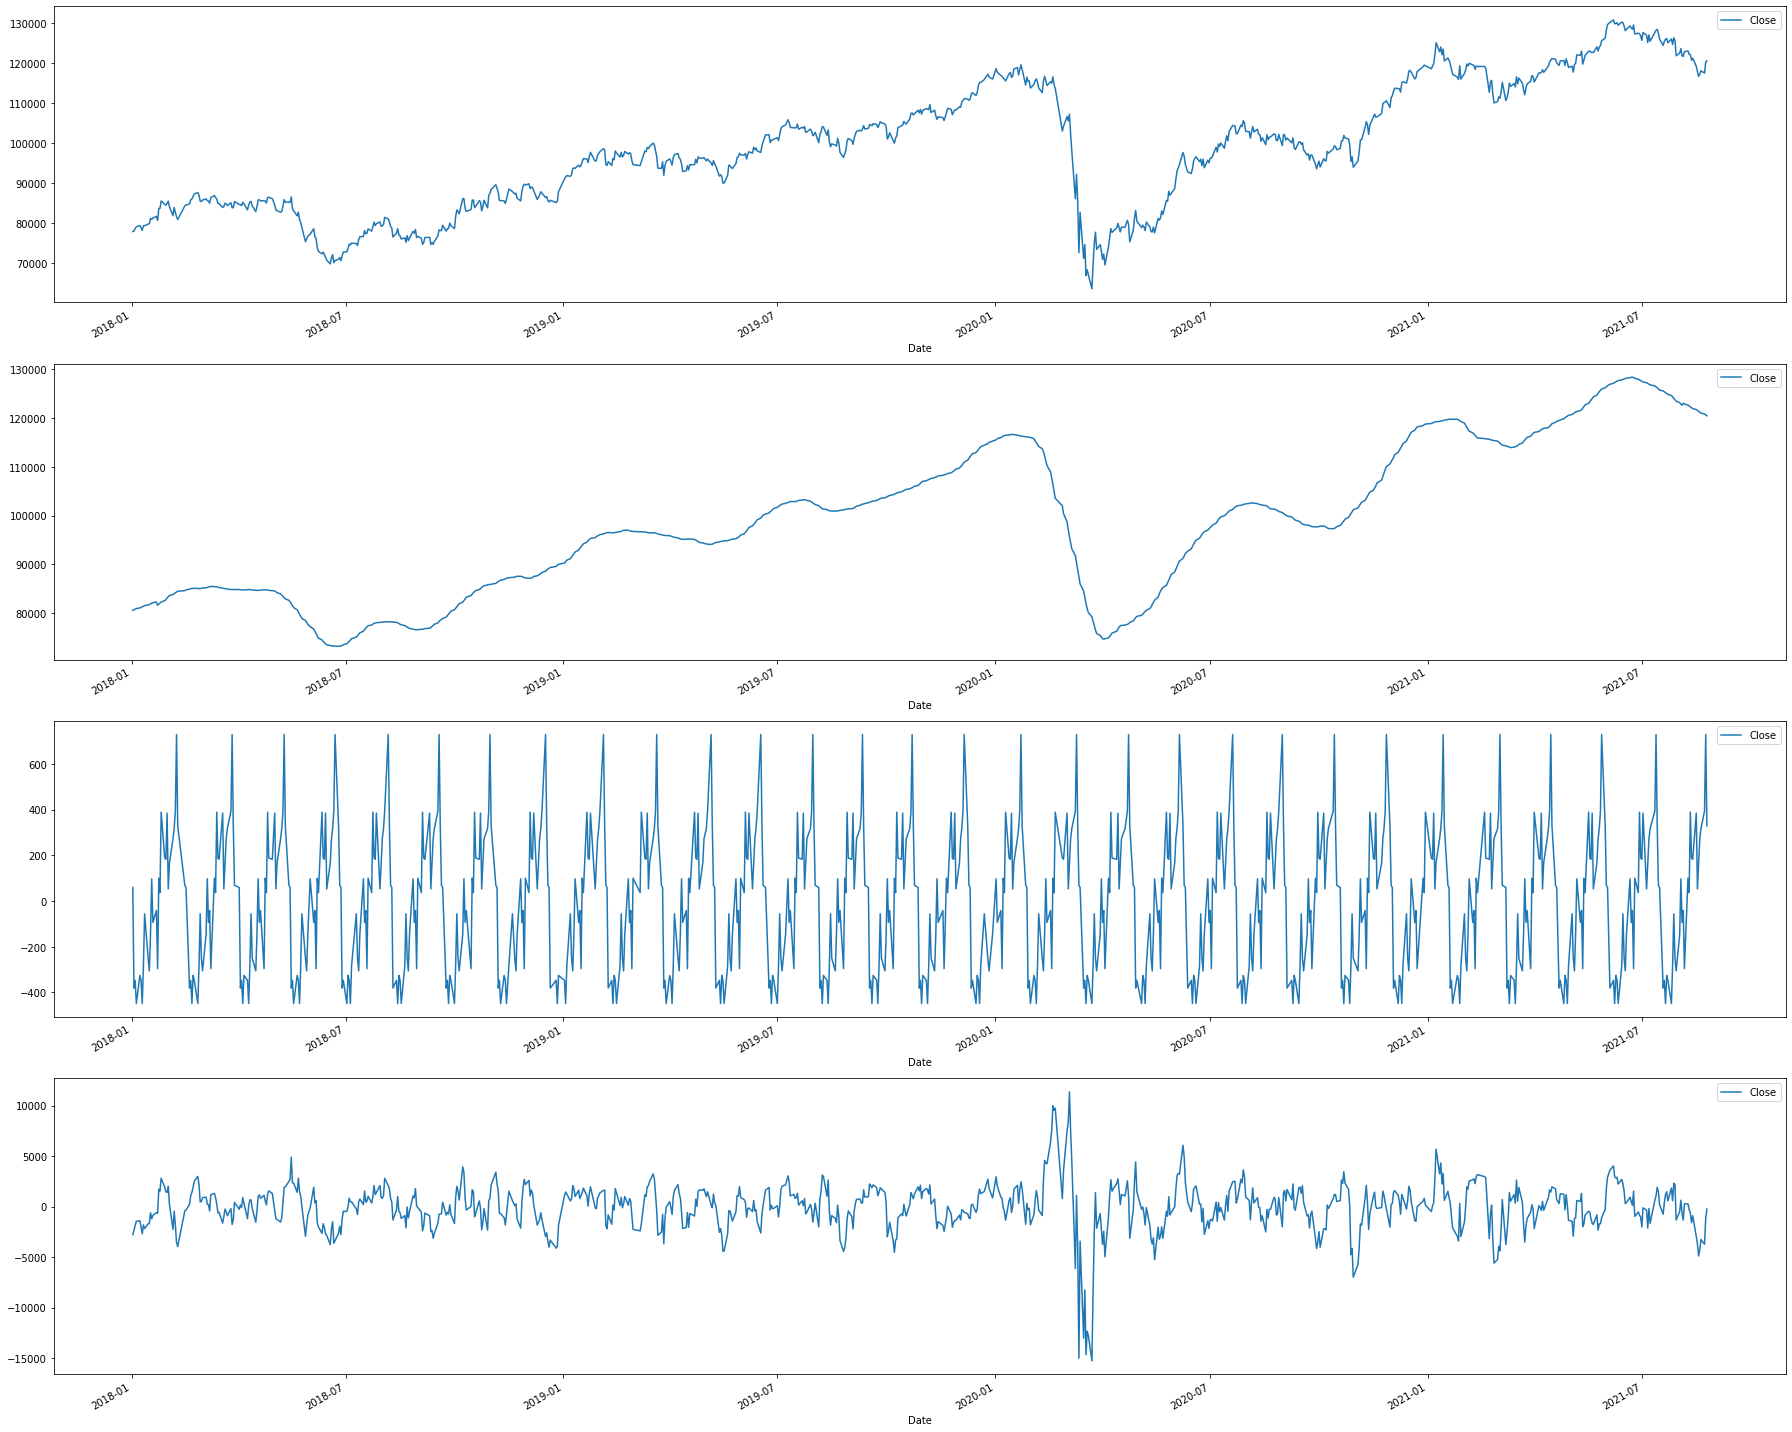

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(25,20))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

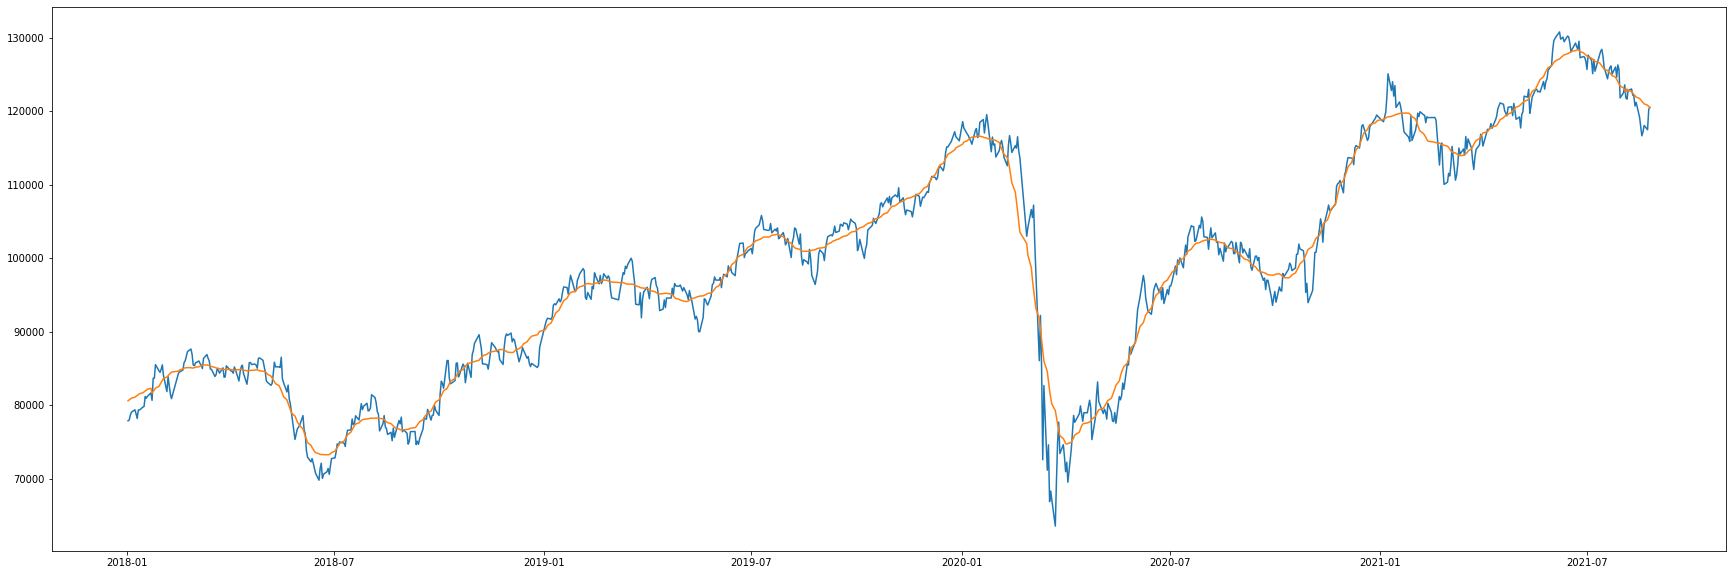

In [25]:
ax, fig = plt.subplots(figsize=(30,10))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

# Calculo da média móvel

In [32]:
df['Close'].rolling(7).mean()

Date
2018-01-02              NaN
2018-01-03              NaN
2018-01-04              NaN
2018-01-05              NaN
2018-01-08              NaN
                  ...      
2021-08-19    119263.285714
2021-08-20    118691.428571
2021-08-23    118230.142857
2021-08-24    118089.714286
2021-08-25    118282.754464
Name: Close, Length: 899, dtype: float64

In [37]:
media_movel7d = df['Close'].rolling(7).mean()
media_movel14d = df['Close'].rolling(14).mean()
media_movel21d = df['Close'].rolling(21).mean()

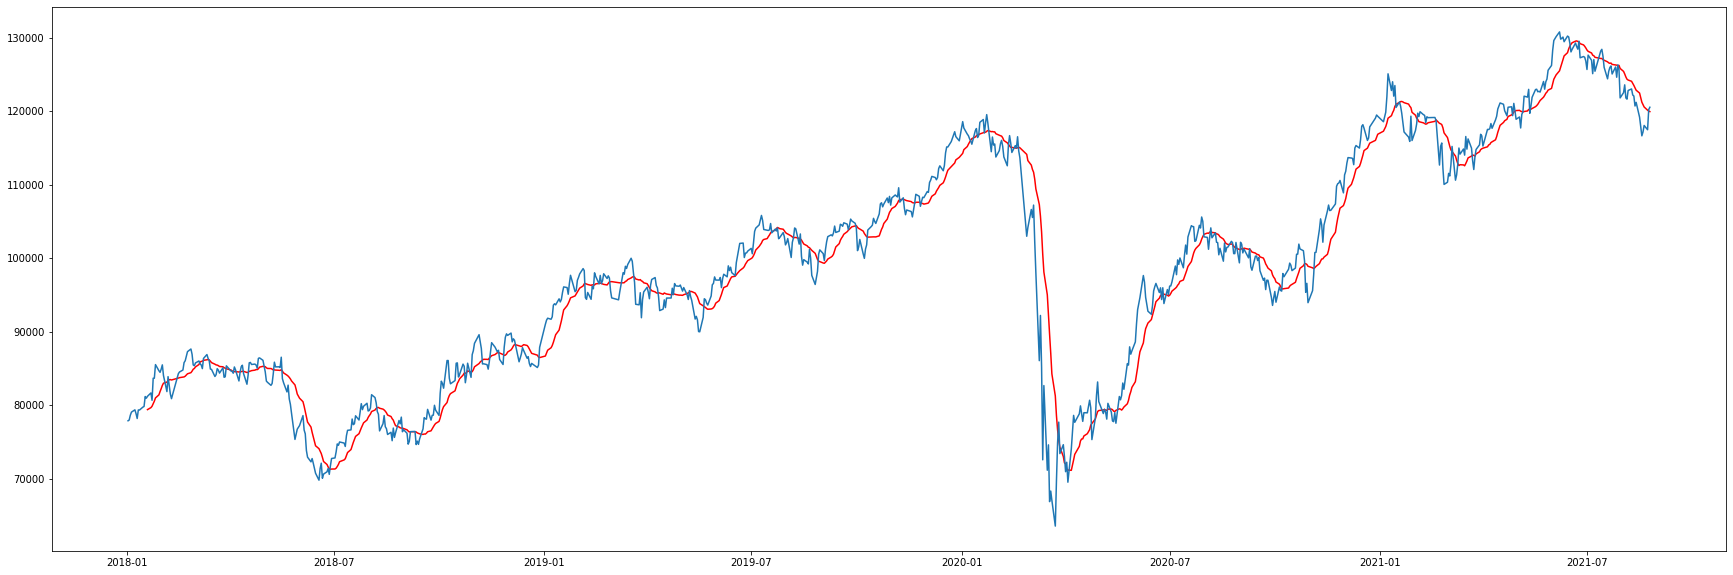

In [40]:
ax, fig = plt.subplots(figsize=(30,10))
#plt.plot(media_movel7d, 'orange')
plt.plot(media_movel14d, 'red')
#plt.plot(media_movel21d, 'black')
plt.plot(df['Close'])